### Кластеризація та регресія в scikit-learn
**Мета роботи:** Ознайомитись з побудовою моделей для вирішення задач
регресії та кластеризації в scikit-learn, визначити основні оцінки цих моделей.  

**Завдання до лабораторної роботи**  
Написати програму, яка навчає та тестує (при потребі) модель, що виконує
завдання відповідно до варіанту, оцінити модель за допомогою відповідних
метрик. 

Варіант 3: seeds.csv. Виконати кластерний аналіз на даних, описати
результати.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('seeds.csv')
df

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  207 non-null    float64
 3   length       210 non-null    float64
 4   width        209 non-null    float64
 5   asymmetry    210 non-null    float64
 6   length.1     210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
pipe = Pipeline([('scale', StandardScaler()), ('kmeans', KMeans(3, random_state=0))])
df = df[['compactness', 'asymmetry', 'length.1', 'length', 'width']].dropna()
pipe.fit(df)

Pipeline(steps=[('scale', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=0))])

In [7]:
from sklearn.metrics import silhouette_score
silhouette_score(df, pipe.predict(df))

0.27428726583323015

In [8]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df, pipe.predict(df))

1.171967929925002

In [9]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(df, pipe.predict(df))

96.39825129555064

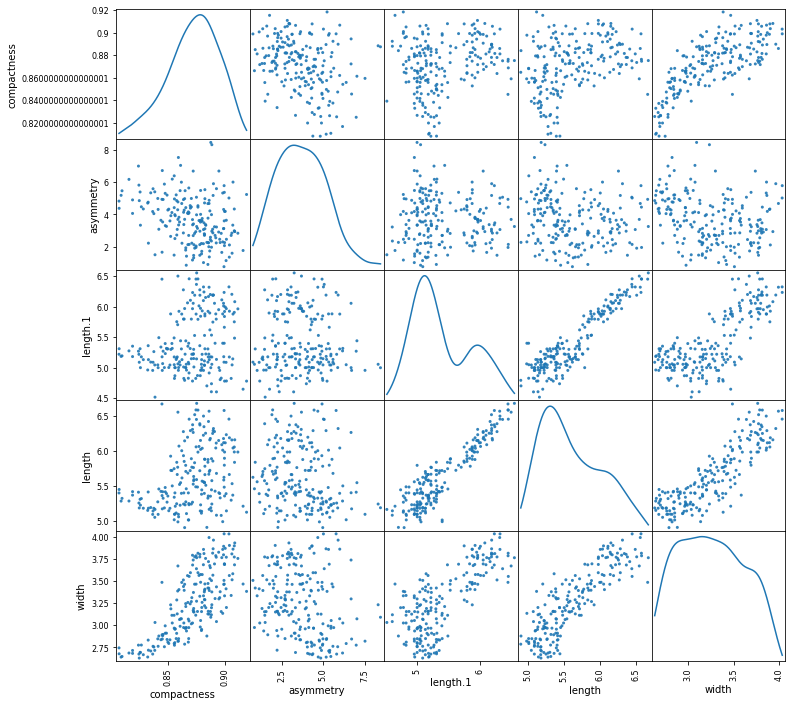

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.9, figsize=(12, 12), diagonal="kde");

In [11]:
prediction = pipe.predict(df)

array([[<AxesSubplot:xlabel='compactness', ylabel='compactness'>,
        <AxesSubplot:xlabel='asymmetry', ylabel='compactness'>,
        <AxesSubplot:xlabel='length.1', ylabel='compactness'>,
        <AxesSubplot:xlabel='length', ylabel='compactness'>,
        <AxesSubplot:xlabel='width', ylabel='compactness'>],
       [<AxesSubplot:xlabel='compactness', ylabel='asymmetry'>,
        <AxesSubplot:xlabel='asymmetry', ylabel='asymmetry'>,
        <AxesSubplot:xlabel='length.1', ylabel='asymmetry'>,
        <AxesSubplot:xlabel='length', ylabel='asymmetry'>,
        <AxesSubplot:xlabel='width', ylabel='asymmetry'>],
       [<AxesSubplot:xlabel='compactness', ylabel='length.1'>,
        <AxesSubplot:xlabel='asymmetry', ylabel='length.1'>,
        <AxesSubplot:xlabel='length.1', ylabel='length.1'>,
        <AxesSubplot:xlabel='length', ylabel='length.1'>,
        <AxesSubplot:xlabel='width', ylabel='length.1'>],
       [<AxesSubplot:xlabel='compactness', ylabel='length'>,
        <AxesSubplo

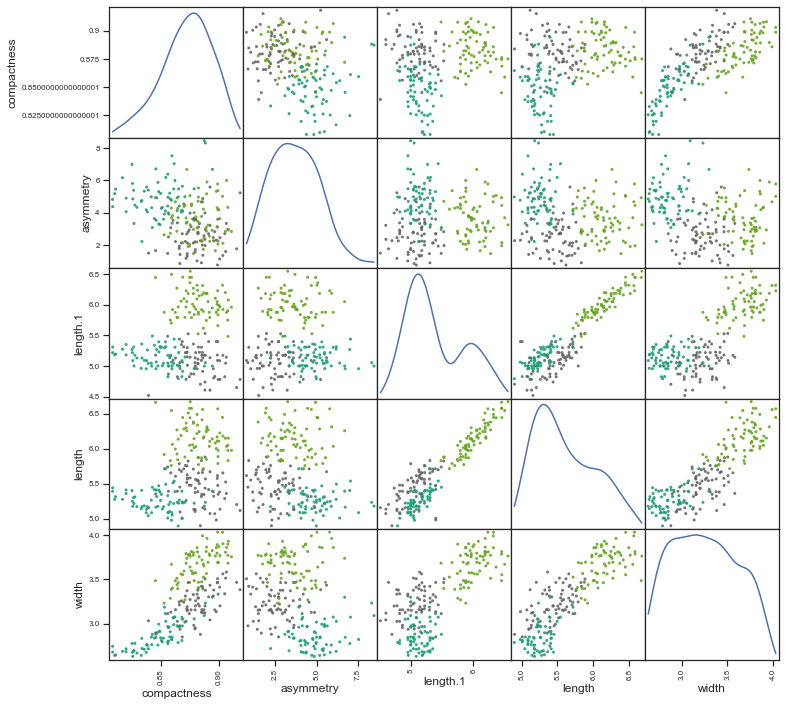

In [12]:
from matplotlib import cm
cmap = cm.get_cmap('Dark2')
sns.set(style="ticks", color_codes=True)
scatter_matrix(df, c=prediction, alpha=0.9, cmap=cmap, figsize=(12, 12), diagonal="kde")